# Lecture 0: Search

- The goal for this lecture is to search for a solution to a problem - any problem like driving from point A to point B....
 

## Terminologies

### Agent: 
- An agent is an entity that percieves its environment and then acts upon that environment

### State: 
- A state is the snapshot of the agent at a particular time in its environment

### Initial State: 
- The state from which the agent begins execution is known as the Initial State

### Action: 
- Actions are choices that can be made in a state.
- For coding, we are going to define a function "ACTION(S)", that takes in a state "S" as an input and returns a set of all actions that are possible in that environment based on the input state.

### Transition Model: 
- An encoding that deals with the relationship between the state and the actions. 
- It is a description of what states may result as the consequence of taking a particular action on any initial state
- For coding, it is defined as a function "RESULT(S, a)" that takes in a particular State "S" as an input along with the Action "a" that is to be performed on it. 
- The output of this function is going to be the State that we get when the Action "a" is performed on State "S"

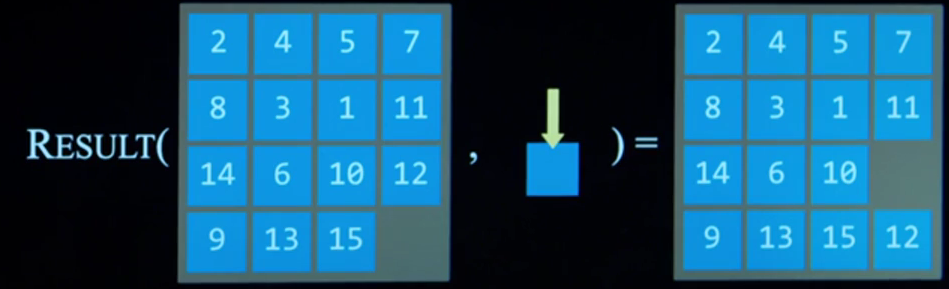

### State Space: 
- The set of all States that are reachable from any given Initial State by performing any sequence of Actions

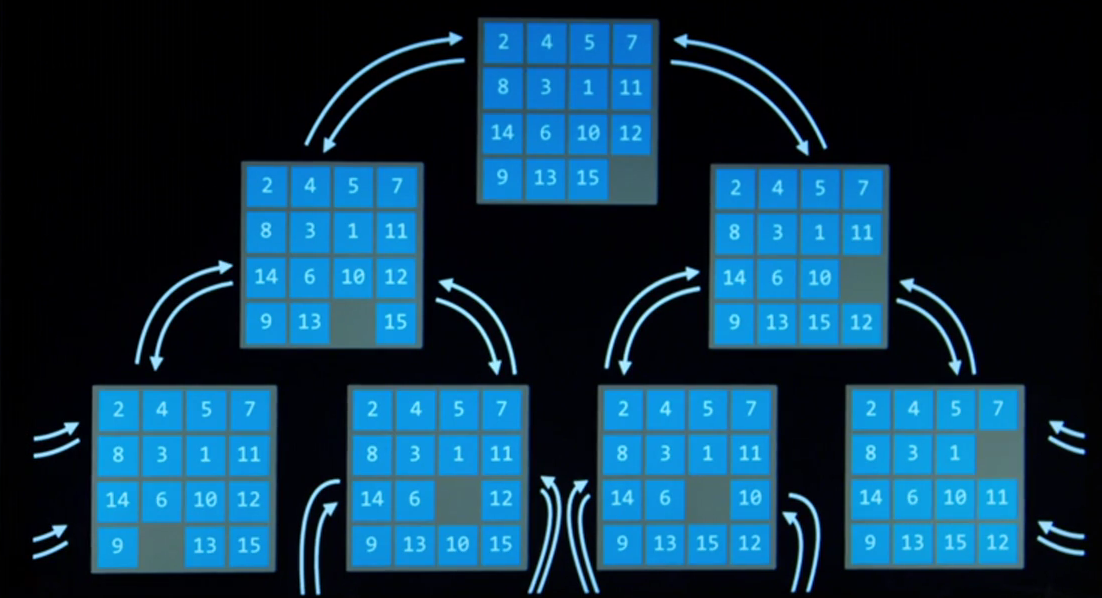  

- This can be represented by a graph

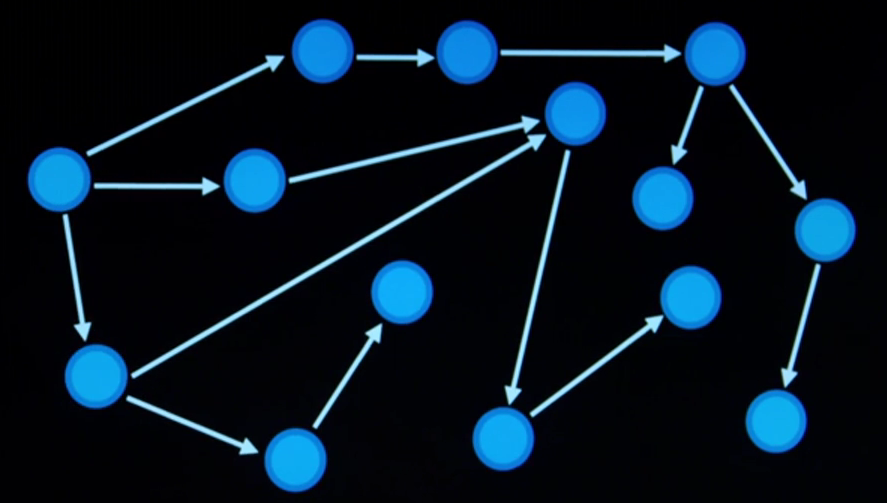

### Goal Test: 
- It is a way to determine if a given state is the Goal State.

### Path Cost: 
- It is a numerical cost that is associated with taking a particular path of Actions(consequitive actions) in order to reach a Goal State.

### Optimal Solution: 
- A solution that has the loewst path cost among all the solutions

### Node: 
- In order for us to find a solution to a search problem, we need to keep track of of where we are in the problem and need to store a whole bunch of data that tells us that. 
- During finding a solution to the problem, we need to store our current progress and all the data associated with it. This is done is a data structure known as the Node
- It is a data structure, that keeps track of: 
    - The State
    - a Parent Node that generated this node
    - an Action that was applied to the Parent Node in order to get the current Node
    - a Path Cost to get from the Initial State to the Current State

### Frontier:

- In order to solve a given Search Problem, we are going to start at a particular State and explore all options that are possible. 
- As we take more actions, more options make themselves available to us. 
- We are going to store all of the available options inside a single data structure called the "Forontier"
- It represents everything that we can explore next, but we have not yet.

### Explored Set:
- The set of States that have already been explored in the process of finding a solution to a Search Problem.

### Approach:

- We begin with a Frontier that contains the Initial State
- Start with an empty Explored Set.
- Repeat: 
    - If the Frontier is empty then we have no solutions possible
    - Otherwise, remove a Node from the Frontier. 
    - After removing the Node, we apply the Goal Test to determine if the Node is a Goal Node. If it is the Goal Node, then we have our solution. 
    - If it is not the Goal Node, then add the Node to the Explored Set. Then, expland the Node(i.e. look at the next Nodes that are possible while looking at the current Node) and add the resulting Nodes to the Frontier if they are not already present in the Frontier or in the Exlpored Set.



## Depth First Search (DFS)

- It is the Search Algorithm that always expands to the deepest Node in a Frontier.
- This is implemented when the Frontier is implemented using a Stack which is a Last in First Out Data Structure.
- It will always find a solution as long as the problem can be solved in a finite number of steps.
- It may not provide the optimal solution.
- It picks one path and keeps following it until it either reaches a dead end or gets to the solution.

## Breadth First Search (BFS)

- It is the Search Algorithm that always expands to the shallowest Node in a Frontier.
- This is implemented when the Frontier is implemented using a Queue which is a First in First Out Data Structure.
- It traverses all the paths at the same time in parallel.


## Code Implementation of a Search Problem of a Maze

In [2]:
import sys

class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action

class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)
    
    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)
    
    def empty(self):
        return len(self.frontier) == 0
    
    def remove(self):
        if self.empty():
            raise Exception("Empty Frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node
        
class Maze():
    def __init__(self, filename):
        
        # Read file and set height and width of the maze
        with open(filename) as f:
            contents = f.read()

        # Validate start and goal
        if contents.count("A") != 1:
            raise Exception("Maze must have exactly one start point (A)")
        if contents.count("B") != 1:
            raise Exception("Maze must have exactly one goal point (B)")
        
        # Determine height and width of the maze
        contents = contents.splitlines()
        self.height = len(contents)
        self.width = max(len(line) for line in contents)

        # Keep track of walls and start and goal positions
        self.walls = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)
        
        self.solution = None

    def print_maze(self, solution=None):
        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    print(u"\u2588", end="")  # Wall
                elif (i, j) == self.start:
                    print("A", end="")  # Start
                elif (i, j) == self.goal:
                    print("B", end="")  # Goal
                elif solution is not None and (i, j) in solution:
                    print("*", end="")  # Solution path
                else:
                    print(" ", end="")  # Empty space
            print()
        print()
    
    def neighbors(self, state):
        row, col = state

        # All possible actions
        candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]

        # Ensure actions are valid
        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        return result
    
    def solve(self):
        """Finds a solution to the maze if it exists."""

        # Keep track of the number of states explored
        self.num_explored = 0

        # Initialize frontier to just the starting position
        start = Node(state=self.start, parent=None, action=None)
        frontier = StackFrontier()
        frontier.add(start)

        # Initialize an empty explored set
        self.explored = set()

        # Loop until solution is found
        while True:

            # If nothing left in frontier, then no path
            if frontier.empty():
                raise Exception("No solution")
            
            node = frontier.remove()
            self.num_explored += 1

            # If node is the goal, then we have a solution
            if node.state == self.goal:
                actions = []
                cells = []

                # Follow parent nodes to find solution
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return
            
            # Mark node as explored
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)

    def output_image(self):
        """Prints the original maze, then prints the maze with the solution path if available."""
        print("Original Maze:")
        self.print_maze()  # Print original maze

        if self.solution:
            print("Maze Solution:")
            self.print_maze(self.solution[1])  # Print maze with solution path
            print(f"Number of states explored: {self.num_explored}")  # Print number of states explored


# Usage example
maze1 = Maze("Maze1.txt")
maze1.solve()
maze1.output_image()


Original Maze:

█████B█
█████ █
████  █
████ ██
     ██
A██████

Maze Solution:

█████B█
█████*█
████**█
████*██
*****██
A██████

Number of states explored: 11


In [3]:
maze2 = Maze("Maze2.txt")
maze2.solve()
maze2.output_image()

Original Maze:

██████████
█A       █
█ ████ █ █
█    █ █B█
█ ████ ███
█        █
██████████

Maze Solution:

██████████
█A*******█
█ ████ █*█
█    █ █B█
█ ████ ███
█        █
██████████

Number of states explored: 10


In [4]:
maze3 = Maze("Maze3.txt")
maze3.solve()
maze3.output_image()

Original Maze:

██████████████████████
█A      █            █
█ ████ ██ █████████  █
█ █  █  █         █  █
█ █ ██ █ █████████ █ █
█ █ ██ █           █ █
█ █    █████████████ █
█ ██████             █
█                    █
█ █████████ ██████████
█         █          █
████████████████████B█

Maze Solution:

██████████████████████
█A      █            █
█*████ ██ █████████  █
█*█  █  █         █  █
█*█ ██ █ █████████ █ █
█*█ ██ █           █ █
█*█    █████████████ █
█*██████             █
█***********         █
█ █████████*██████████
█         █**********█
████████████████████B█

Number of states explored: 96


In [5]:
maze4 = Maze("Maze4.txt")
maze4.solve()
maze4.output_image()

Original Maze:

██    █
██ ██ █
█B █  █
█ ██ ██
     ██
A██████

Maze Solution:

██****█
██*██*█
█B*█**█
█ ██*██
*****██
A██████

Number of states explored: 17


- The solution to maze 4 is not the optimal solution. Depth First Search is not able to find an optimal solution to the maze. Breadth First Search will provide a more optimal solution in this case where the Frontier is established by implementing a Queue instead of a Stack


## Uninformed Search Algorithms:
- Uniformed Search Algorithms are those search algorithms that do not use any problem specific knowledge to solve the problem at hand. eg: Both Breadth First Search and Depth First Search Algorithms to find the path in a maze are uninformed search algorithms.

## Informed Search Algorithms:
- Informed Search Algorithms are those search algorithms that use problem specific knowledge to find solutions to the problem. These increase the efficiency of problem solving.
- eg: Greedy Best First Search


## Greedy Best First Search Algorithm
- This Search Algorithm is always going to expand the Node that it thinks is closest to the Goal.
- It estimates this closeness to the goal by implementing a Heuristic function"h(n)". It is a function that estimates the closeness to the goal.

- eg: by calculating the *Manhattan Distance* i.e. the distance between the Source and the Destination in terms of number of horizontal and vertical squares. In this case, the heuristic function would be the Manhattan Distance.
- Here the heuristic function ignores the walls and is not a guarentee to be the most optimal route.

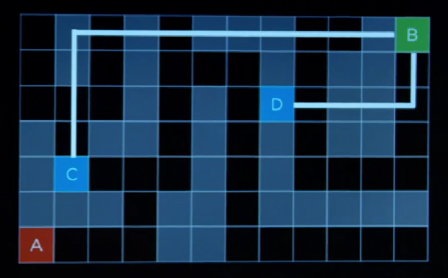

- After calculating the Manhattan Distance of every square from the Destination, we get the following maze:

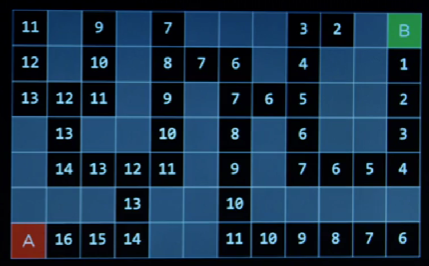

- The path taken by implementing the Greedy Best First Algorithm:

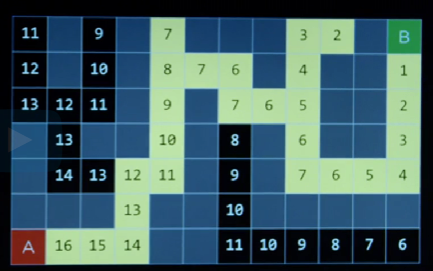

- The Manhattan Distance will not find the optimal solution every time. It is not the best heurestic in this case. eg:

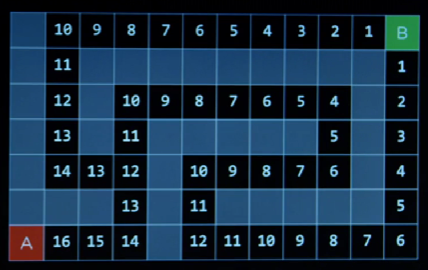

### Disadvantages of Greedy Best First Search:

![Screenshot 2024-10-30 154934.png](<attachment:Screenshot 2024-10-30 154934.png>)

- As shown in the above maze, It is not always providing the optimal solution. 
- We can see that it takes far fewer steps to reach the 12 marked in green than it does to reach the 12 marked in red. By selecting the path that begings from 13 in the green 12, even though it is Heuristically greater, we can get to the Destination in a more optimal manner. This is where A* Search comes into the picture. 
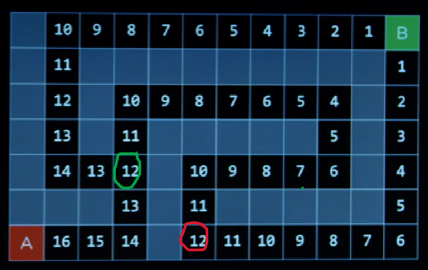

## A* Search:

- It is a Search Algorithm that is going to expand the Node with the lowest value of g(n) + h(n), where 
    - g(n) -> Cost to reach the Node
    - h(n) -> Estimated cost to the Goal

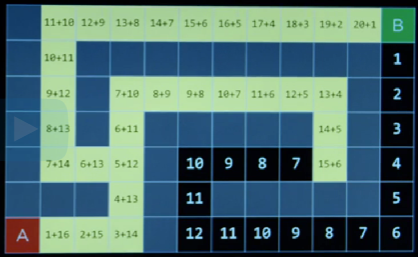

- A* Search is optimal if:
    - h(n) is admissible i.e. the heuristic function should not overestimate the true cost. It should either estimate it correctly or underestimate the cost, but never overestimate it.
    - h(n) is consistent i.e. for every Node "n" and its successor Node " n' " with the cost to move to the successor being "c", h(n) <= [ h(n') + c ]
    

## Adverserial Search Problem:

- This Search Algorithm is implemented in situations with more than one aegents where one Agent is trying to reach to a particular Goal and the other agent(The Adversary) wants to prevent this from hapenning. This is usefull in applications like Tic Tac Toe.


### Minimax Algorithm:

- It workd very well for deterministic games where two players are involved like Tic Tac Toe.

- We will assign three numbers to three situations that are possible in a game of Tic Tac Toe. 
    - Assign -1 to "O" winning.
    - Assign 0 to nobody winning.
    - Assign 1 to "X" winning.
    
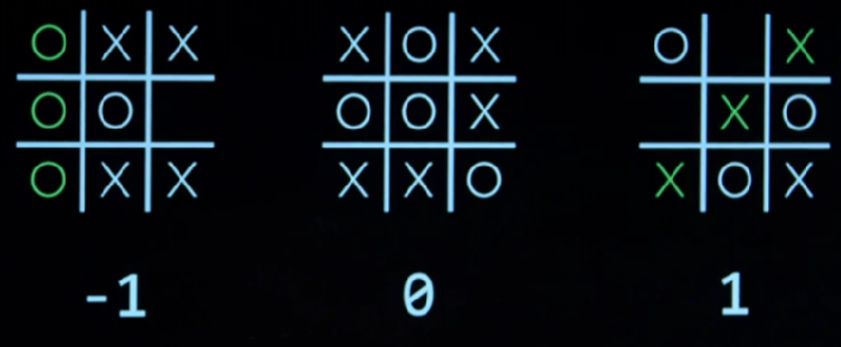

- We have two agents(players). We will call the "O" player the MIN player and the "X" player the MAX player
    - MAX(X) aims to maximize the score
    - MIN(O) aims to minimize the score
- The notion of winning and losing in a game is mathematically reduced to minimizing and maximizing the score 


## AI that plays Tic Tac Toe

### Terminologies defiened:

- *S0*: Initial State

- *PLAYER(S)*: Returns which player to move in State "S". It takes a Tic Tac Toe Gameboard as an Input and tells us which players turn it is to play

- *ACTION(S)*: Returns the legal moves possible in a State "S"

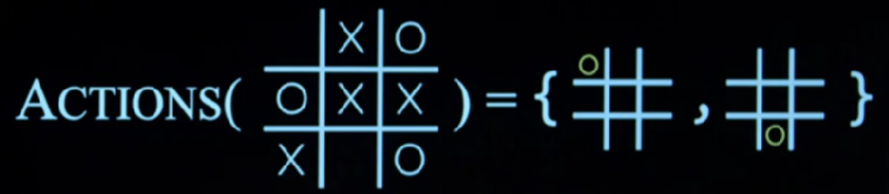

- *RESULT(S, a)*: Returns the State after an Action "a" is performed on a State "S"

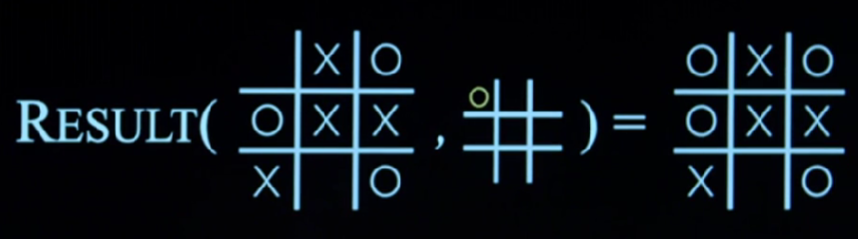

- *TERMINAL(S)*: A function that checks if the game is in a Terminal State i.e. in a State where either someone has got 3 in a row or all the squares on the board are used

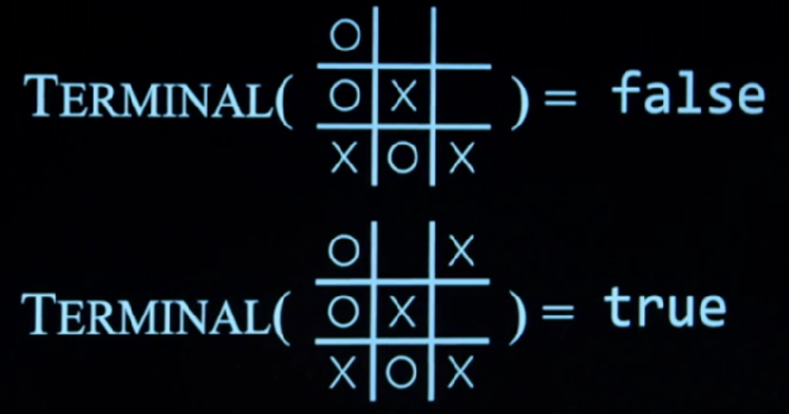

- *UTILITY(S)*: A Utility function that takes a State as an input and that gives a numerical value for that. If "X" wins the game, then the numerical value should be 1 and so on..

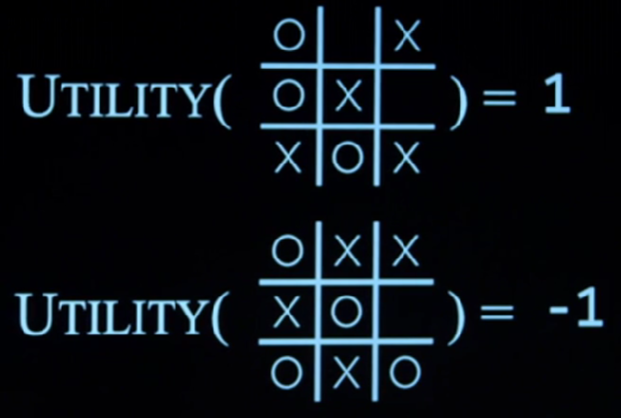

### Algorithm

- Given a State "S":
    - MAX picks the Action "a" in ACTION(S) that produces the highest value of MIN-VALUE(RESULT(S, a)) i.e. To select the maximum value out of all possible Actions by the oponent
    - MIN picks the Action "a" in ACTION(S) that produces the lowest value of MAX-VALUE(RESULT(S, a)) i.e. To select the maximum value out of all possible Actions by the oponent

In [ ]:
# We want the value to be as high as possible
function MAX-VALUE(state):
    if TERMINAL(state):
        return UTILITY(state)
    # Setting the value to be as low as possible initially
    value = -INF
    for Action in ACTION(state):
        # Picking the maximum of the current score and the Value that the oponent may have
        value = max(value, MIN-VALUE(RESULT(state, Action)))
    return value

# We want the value to be as low as possible
function MIN-VALUE(state):
    if TERMINAL(state):
        return UTILITY(state)
    # Setting the value to be as low as possible initially
    value = INF
    for Action in ACTION(state):
        # Picking the minimum of the current score and the Value that the oponent may have
        value = min(value, MAX-VALUE(RESULT(state, Action)))
    return value

### Optimizations:

#### Alpha - Beta Pruning:

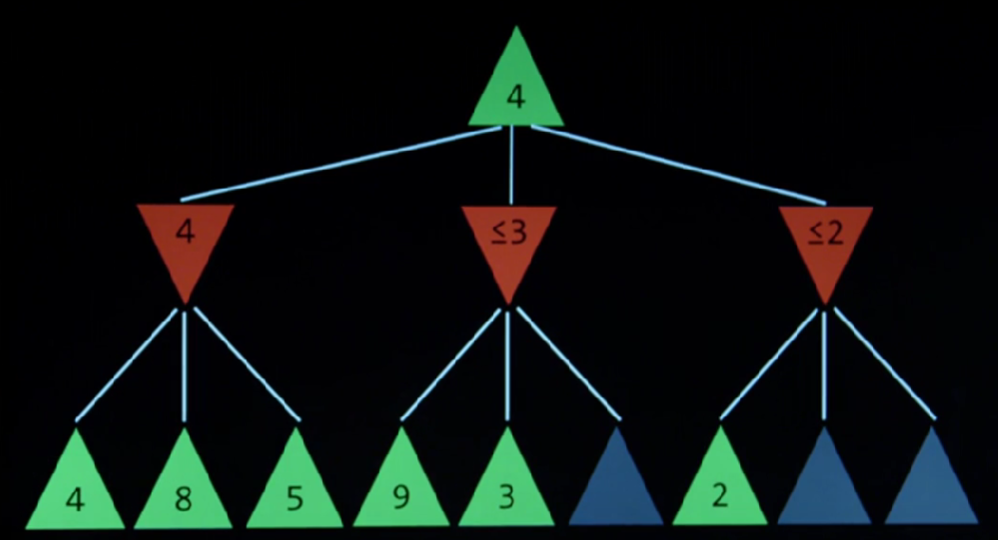

- In the above tree, consider the second MIN choice. Assuming that the adversary plays optimally, we know that that branch will always have a value less than 3. We also know that in the first branch, we have a value that is greater than that. Thus, as we are looking for the greatest possible value, we will always prefer to go ahead with the first Branch having "4" as its value. Thus, there is no need to look at what value the other branches hold. Thus we can prune those branches and anything below them.

- Alpha -> The value that stores what is the best we can do so far
- Beta  -> the value that stores what is the worst we can do so far
- Pruning -> Removing some of the Nodes of a huge Tree that do not need to be searched in order to optimize the solution

### Problems with the Min Max Algorithm:
- Tic Tac Toe is a very simple game with only 255,168 total possible games.
- However, comparing that to a more complex game like chess, we see that there are 10^2900 possible chess games. The Min Max Algorithm considers all possible actions and looking through this many states is very difficult to acomplish in a reasonable amount of time. 
- This is where Depth Limited Min Max Algorithm comes into play


## Depth Limited Min Max Search Problem:

- It will look into a certain number of moves possible and then stop considering moves as it may become computationaly expensive. However, then it would face an issue in assigning values to the games. Assigning values is very easy if the game is over, but how to do it if the game is incomplete?

- *Evaluation Function:* A function that estimates the expected utility value of the game from a given state
 